Ecological Tipping Points using TD3

In [1]:
import numpy as np
import stable_baselines3 as sb3
import gym
import gym_conservation
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
ALGOS = {"TD3": sb3.TD3}


In [2]:
algo = "TD3"
RL = ALGOS[algo]
env_id = "conservation-v6"
team = "team_cboettig"
agent_id = env_id + "-" + algo + "-" + team
agent_id

'conservation-v6-TD3-team_cboettig'

In [3]:
seed = 24
np.random.seed(seed)

In [4]:
env = gym.make(env_id)

In [5]:
noise_std = 0.4805935357322933
OU = sb3.common.noise.OrnsteinUhlenbeckActionNoise
action_noise = OU(mean=np.zeros(1), sigma=noise_std * np.ones(1))
model = RL(
    "MlpPolicy",
    env,
    verbose=0,
    seed=42,
    gamma=0.995,
    learning_rate=8.315382409902049e-05,
    batch_size=512,
    buffer_size=10000,
    train_freq=1000,
    gradient_steps=1000,
    action_noise=action_noise,
    policy_kwargs={"net_arch": [64, 64]},
    tensorboard_log="/var/log/tensorboard/conservation-v6"
)

In [6]:
if not os.path.exists((agent_id+".zip")):
    model.learn(total_timesteps=3000000)
    model.save(agent_id)

In [7]:
model = RL.load(agent_id)

score = evaluate_policy(model, Monitor(env), n_eval_episodes=10)
score

(46.5026467, 12.49218812490975)

In [8]:
sims = env.simulate(model, reps=100)
policy = env.policyfn(model, reps=10)

In [14]:
rep0

,time,state,action,reward,rep
0,0,0.800000,0.000000,0.000000,0
1,1,1.286342,0.092557,0.554053,0
2,2,0.677377,0.193120,0.366536,0
3,3,0.795776,0.072956,0.437815,0
4,4,0.774218,0.091804,0.427943,0
...,...,...,...,...,...
2495,495,0.059780,0.003571,0.056395,4
2496,496,0.059607,0.004198,0.056236,4
2497,497,0.056210,0.004171,0.053201,4
2498,498,0.081292,0.003671,0.075167,4


In [ ]:
AxesSubplot(0.125,0.125;0.775x0.755)

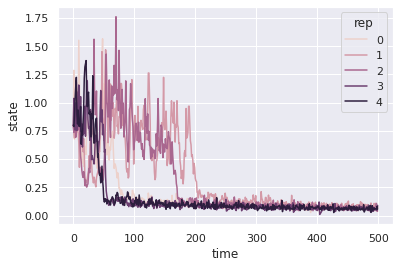

In [15]:
import seaborn as sns
sns.set_theme(style="darkgrid")
rep0 = sims.query("rep < 5")

sns.lineplot(x="time", y="state", hue = "rep", data=rep0)

df = rep0.melt(id_vars=['time','rep'],var_name='metric', value_name='values')
#sns.lineplot( x="time", y="values", hue="metric", data = df)



# Policy plot

The policy plot gives a sense of the strategy employed

<AxesSubplot:xlabel='state', ylabel='action'>

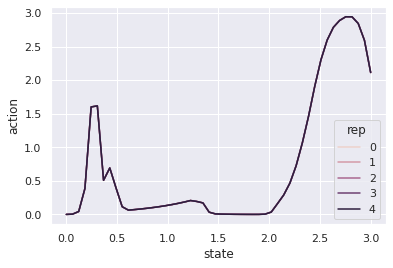

In [16]:
df = policy.query("rep < 5")
sns.lineplot(data = df, x="state", y="action", hue = "rep")